Aproximación

Por Pablo Angulo y Fabricio Macià para ETSIN@UPM

In [1]:
import numpy as np
import numpy.random
import scipy as sp
import scipy.linalg as la
import sympy as sym
import matplotlib.pyplot as plt

# Aproximación

La **aproximación** está íntimamente relacionada con la interpolación. La formulación del problema de **aproximación** es la siguiente:

Dados unos puntos

$$
x_0,x_1,\dots,x_N
$$

no necesariamente distintos, y unos valores

$$
y_0,y_1,\dots,y_N
$$

buscamos una función $f$ que cumpla ciertas condiciones (por ejemplo, que sea un polinomio de grado $r$) y que aproxime/ajuste _lo mejor posible_ los valores $y_j$ por los puntos $x_j$.


Cual es la mejor posible aproximación depende del contexto en que nos encontremos. Un criterio muy utilizado es pedir que $f$ **minimice** el **error cuadrático**. Queremos pues que $f(x)$ sea una función, dentro de una cierta clase de funciones, para la cual el error:

$$
\sum_{j=0}^N(y_j-f(x_j))^2=(y_0-f(x_0))^2+(y_1-f(x_1))^2+\dots+(y_N-f(x_N))^2,
$$

sea lo más pequeño posible.

El problema de interpolación puede describirse como el problema de aproximación en el que pedimos que el error sea cero. 

En ocasiones, típicamente porque los datos de que disponemos son contradictorios debido a errores experimentales o de modelización, el problema de interpolación no tiene solución. Tiene sentido entonces considerar el problema de aproximación. 

A menudo, el problema de interpolación puede resolverse, pero la solución del problema de aproximación es más útil. Es el caso siempre que haya errores de medición.

## Aproximación con polinomios

Buscamos un polinomio de grado a lo sumo $m$:
$$
P(x) = a_0 + a_1\cdot x + \dots + a_m\cdot x^m
$$
pero tenemos $N+1>m+1$ puntos de interpolación
$$
(x_0,y_0),\:(x_1,y_1),\dots,(x_N,y_N).
$$
Sabemos que en general son demasiadas condiciones, y no hay ningún polinomio de grado menor o igual a $m$ que pase por todos los puntos (aunque puede ocurrir en casos concretos).

Es decir, ningún polinomio de grado menor o igual a $m$ cumple estas $N+1$ condiciones:
$$
P(x_0)=y_0,\:p(x_1)=y_1,\dots,p(x_N)=y_N.
$$

> - **Aproximación**: dataset: $\{(x_i,y_i)\}_{i=0}^N$ buscamos una función que **no pasa exactamente por los N puntos**, y tenemos **menos parámetros que datos**

Como mencionamos anteriormente, el objetivo al hacer aproximación (con polinomios) es minimizar el error total, usualmente el error cuadrático total:

$$
\sum_{i=0}^N \left(y_i - P(x_i)\right)^2
$$

para
$$
P(x)=\sum_{j=0}^m a_j x^j
$$

> - ¡¡*Es una función cuadrática (y convexa) de las incógnitas* $a_j$!! => podemos encontrar el mínimo global fácilmente con técnicas de Cálculo II, que nos da la __"solución de mínimos cuadrados"__, que también estudiasteis en Álgebra Lineal.

### Ejemplo  de ajuste lineal


Tratamos de predecir la  *temperatura*  a la que hierve el agua ( **T** ), conocida la  *presión atmosférica*  ( **P** ) en el lugar y momento en que hacemos el experimento.

Para ello, contamos con un conjunto de mediciones de ambas variables, con la temperatura en grados Fahrenheit y la presión en pulgadas de mercurio (sea lo que sea, es una unidad de medidad de presión). Por ejemplo, en un cierto punto de los Alpes, un cierto día, el barómetro marcaba 20.79 pulgadas de mercurio, y el agua hirvió a 194.5 grados Fahrenheit. Las mediciones se realizaron en el mismo lugar geográfico, pero en días distintos, con distintas condiciones atmosféricas y quizá incluso por personas distintas. En estas condiciones, es imposible que ningún modelo prediga con exactitud el valor de T en función de P, pero esperamos que lo haga con un margen de error moderado.


Los datos parecen estar dispuestos *aproximadamente* sobre una recta, de modo que intentamos ajustar un modelo lineal, de la forma:

$$
T=a+b\cdot P
$$

Nuestras incógnitas son los valores de **a**  y  **b**. Si el modelo lineal fuera exacto, se cumplirían las $n$ ecuaciones
$$
T_i=a+b\cdot P_i,\quad i=1,\dots,n
$$
donde $n=17$ es el número de mediciones. Se trata de un sistema de 17 ecuaciones para dos incógnitas, que no tiene solución. Para unos valores fijos de  **a**  y  **b** , cometeremos un error en la medición j-ésima que será exactamente: $|T_j-(a+b\cdot P_j)|$.

Podemos escoger los valores de  **a**  y  **b**  para los que el error máximo cometido es menor, o aquellos para los que el error medio cometido es menor, o según otros muchos criterios. Es bastante habitual en estadística buscar los valores de  **a**  y  **b**  que hacen mínimo el  **error cuadrático total** :


$$
E=\sum_j (T_j-(a+b\cdot P_j))^2
$$    

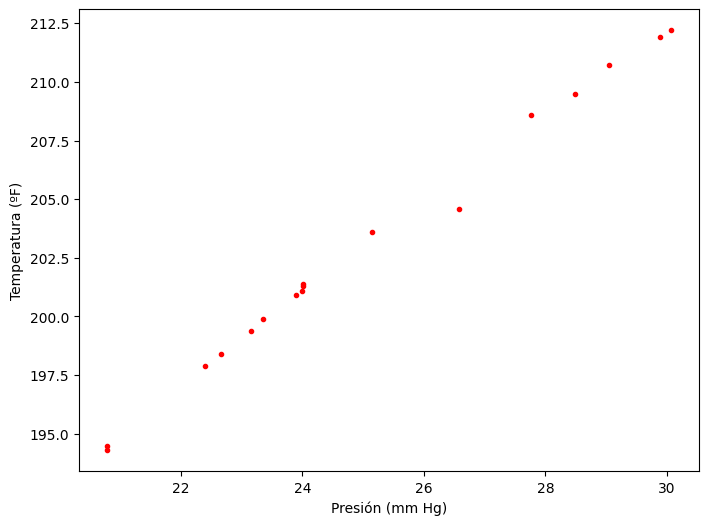

In [2]:
T_values = np.array( [194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2])
P_values = np.array( [20.79, 20.79, 22.4, 22.67, 23.15, 23.35, 23.89, 23.99, 24.02, 24.01, 25.14, 26.57, 28.49, 27.76, 29.04, 29.88, 30.06])

plt.figure(figsize=(8, 6))
plt.plot(P_values, T_values,'r.')

plt.xlabel('Presión (mm Hg)')
plt.ylabel('Temperatura (ºF)')
plt.show()

### Ejercicio

 - Investiga la [documentación de `polyfit`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) para calcular el polinomio aproximador.
 - Usa `polyfit` para ajustar un polinomio de grado 1, y otro de grado 2, a los datos anteriores.

> Los polinomios de grado 1 y 2 son muy parecidos, porque un polinomio de grado 1 aproxima bastante bien, y no es necesario un término de grado 2.

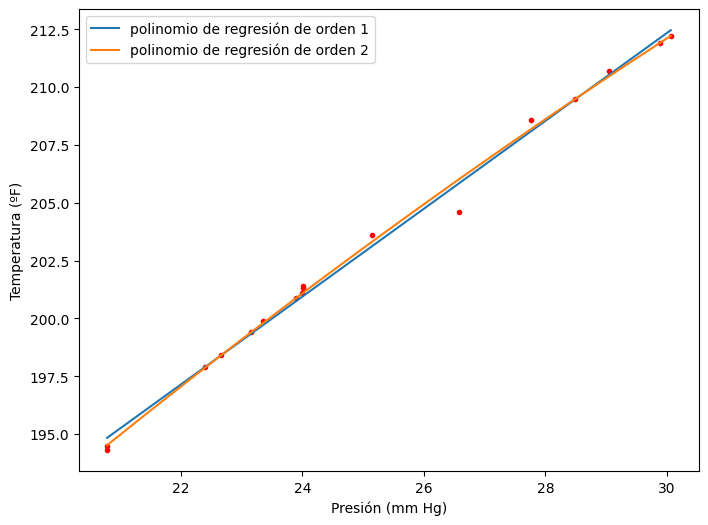

In [3]:
xs = P_values
ys = T_values

cs1 = np.polyfit(xs, ys, 1)
cs2 = np.polyfit(xs, ys, 2)

x_eval = np.linspace(min(xs), max(xs))
y_poly1 = np.polyval(cs1, x_eval)
y_poly2 = np.polyval(cs2, x_eval)

plt.figure(figsize=(8, 6))
plt.plot(xs, ys,'r.')
plt.plot(x_eval, y_poly1, label='polinomio de regresión de orden 1')
plt.plot(x_eval, y_poly2, label='polinomio de regresión de orden 2')
plt.xlabel('Presión (mm Hg)')
plt.ylabel('Temperatura (ºF)')
plt.legend()
plt.show()

### Ejercicio

Repetimos ahora el ejercicio anterior para una serie de experimentos en un canal de ensayos en las que se mide la resistencia de varias embarcaciones similares a distinto número de Froude.

El objetivo es predecir la resistencia como función polinómica del número de Froude:
$$
R = P(F)
$$

Resistencia y número de Froude en las pruebas

    Froude   resistence
    0.125    0.03
    0.15     0.18
    0.175    0.4
    0.2      0.73
    0.225    1.3
    0.25     2.16
    0.275    3.35
    0.3      5.06
    0.325    7.14
    0.35     10.36
    0.375    15.25
    0.4      23.15
    0.425    34.62
    0.45     51.5

### Ejercicio

 - Usa `polyfit` para ajustar polinomios de grado 1, 2, 3 y 4 a los datos anteriores.

In [3]:
data = np.array([
    [0.125,0.03],
    [0.15,0.18],
    [0.175,0.4],
    [0.2,0.73],
    [0.225,1.3],
    [0.25,2.16],
    [0.275,3.35],
    [0.3,5.06],
    [0.325,7.14],
    [0.35,10.36],
    [0.375,15.25],
    [0.4,23.15],
    [0.425,34.62],
    [0.45,51.5]
])
# la x es la variable que controlamos: el número de Froude, la primera columna 
# del array data
xs = data[:,0]
# la y es la variable que no controlamos: la resistencia, la segunda columna 
# del array data
ys = data[:,1]


In [4]:
ys

array([3.000e-02, 1.800e-01, 4.000e-01, 7.300e-01, 1.300e+00, 2.160e+00,
       3.350e+00, 5.060e+00, 7.140e+00, 1.036e+01, 1.525e+01, 2.315e+01,
       3.462e+01, 5.150e+01])

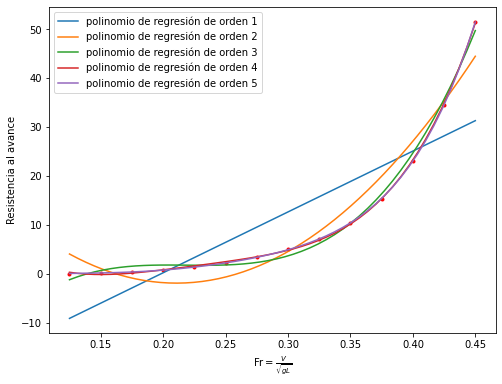

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(xs, ys,'r.')
x_eval = np.linspace(min(xs), max(xs))

for degree in range(1,6):
    cs = np.polyfit(xs, ys, degree)
    y_poly = np.polyval(cs, x_eval)
    plt.plot(x_eval, y_poly, label='polinomio de regresión de orden %d'%degree)

plt.xlabel(r'$\mathrm{Fr} =\frac{V}{\sqrt{gL}}$')
plt.ylabel('Resistencia al avance')
plt.legend()
plt.show()

> Los datos corresponden a yates, y por tanto al aumentar la velocidad podría entrar en régimen de planeo, y la tendencia no funcionaría. Para barcos más grandes, es habitual postular que la resistencia depende de forma cúbica de la velocidad en el rango de operación habitual, aunque vemos en la gráfica que el polinomio cúbico ajustado no es siempre creciente. El modelo que se suele emplear es de tipo _Resistencia = c Velocidad^3_, para forzar que sea creciente en la velocidad. En general los modelos polinómicos que se suelen manejar sólo funcionan en un rango de velocidades concreto, por ejemplo cerca de la velocidad de crucero, pero no dan buenas predicciones para la resistencia al avance durante las maniobras (o viceversa).

## Construir el polinomio aproximador
Planteamos un sistema de ecuaciones para los coeficientes de un polinomio:
$$
P(x) = a_0 + a_1\cdot x + \dots + a_m\cdot x^m
$$
que corresponden a "el polinomio pasa por los $N+1$ puntos de interpolación"
$$
P(x_0)=y_0,\:P(x_1)=y_1,\dots,P(x_N)=y_N.
$$
Desarrollando esta expresión, los coeficientes del polinomio interpolador (que en general no existe si $N>m$) son la solución del sistema de ecuaciones:
$$
V\cdot \mathbf{a} = \mathbf{y},
$$
donde
$$
{\displaystyle V={\begin{bmatrix}1&x _{0}&x _{0}^{2}&\dots &x _{0}^{m}\\1&x _{1}&x _{1}^{2}&\dots &x _{1}^{m}\\1&x _{2}&x _{2}^{2}&\dots &x _{2}^{m}\\\vdots &\vdots &\vdots &\ddots &\vdots \\1&x _{N}&x _{N}^{2}&\dots &x _{N}^{m}\end{bmatrix}}.}
$$
$$
{\displaystyle \mathbf{a}={\begin{bmatrix}a _{0}\\a_1\\\vdots\\a_m\end{bmatrix}};
\mathbf{y}={\begin{bmatrix}y_{0}\\y_1\\\vdots\\y_N\end{bmatrix}},}
$$


### Solución de mínimos cuadrados

El sistema de ecuaciones planteado en general no tiene solución

$$
V\cdot \mathbf{a} = \mathbf{y},
$$

Sin embargo, la solución de mínimos cuadrados está definido por 

$$
\left(V^T\cdot V\right)\cdot \mathbf{a} = V^T\cdot \mathbf{y},
$$
y este sistema de ecuaciones sí tiene solución única

### Ejercicio

 - Replica la solución obtenida mediante `polyfit` en alguno de los ejercicios anteriores planteando y resolviendo este sistema de ecuaciones.

> Modificamos el código de los cuadernos `numpy` o `interpolacion` para construir la matriz de Vandermonde.

In [7]:
# En el cuaderno numpy_s puedes encontrar otras formas vectorizadas
# de construir esta matriz
def vandermonde(xs, grado):
    '''matriz de Vandermonde'''
    l = len(xs)
    M = np.zeros((l,grado+1))
    for i in range(l):
        for j in range(grado+1):
            M[i,j] = xs[i]**j
    return M

> Comprobamos que resolver $\left(V^T\cdot V\right)\cdot \mathbf{a} = V^T\cdot \mathbf{y}$ da la misma solución que polyfit:

In [8]:
import scipy.linalg as la

xs = P_values
ys = T_values

V = vandermonde(xs, 1)
la.solve(V.T@V, V.T@ys), np.polyfit(xs, ys, 1)


(array([155.29648346,   1.90178352]), array([  1.90178352, 155.29648346]))

> Comprobamos el resultado para el polinomio aproximador de grado 2 (`np.flip` da la vuelta a los datos del array)

In [9]:
V = vandermonde(xs, 3)
np.flip(la.solve(V.T@V, V.T@ys)), np.polyfit(xs, ys, 3)

(array([ 5.03130462e-03, -4.02223016e-01,  1.25258738e+01,  6.26316338e+01]),
 array([ 5.03130460e-03, -4.02223014e-01,  1.25258738e+01,  6.26316341e+01]))

## Entender la aproximación mediante bases de funciones

¿Podemos entender la aproximación usando las combinaciones lineales de funciones?

Supongamos que buscamos una función de la forma
$$
f(x) = \sum_{j=0}^m a_j f_j(x)
$$
para una base $f_j(x)$, que puede ser la base de polinomios de Lagrange, la de Hermite, una base de splines, de elementos finitos...

> - **Aproximación**: dataset: $\{(x_i,y_i)\}_{i=0}^N$ buscamos una función que **no pasa exactamente por los n puntos**, y tenemos **menos parámetros (m+1) que datos (N+1)**

El objetivo al hacer aproximación es minimizar el error total, usualmente el error cuadrático total:

$$
\sum_{i=0}^N \left(y_i - \sum_{j=0}^m a_j f_j(x_i)\right)^2
$$

> - ¡¡*Es una función cuadrática (y convexa) de las incógnitas* $a_j$!! => podemos encontrar el mínimo global $\textbf{con la gorra}^{TM}$.

Vamos a escribir el error en forma vectorial

$$
\left\Vert \mathbf{y} - \sum_{j=0}^m a_j f_j(\mathbf{x})\right\Vert^2
$$

donde $\mathbf{y}=(y_i)_{i=0}^N$, $f_j(\mathbf{x})=(f_j(x_i))_{i=0}^N$ son datos, no incógnitas. Escribimos $\mathbf{a}=(a_j)_{j=0}^m$ y $F$ como una matriz $N\times m$ con entradas $(f_j(\mathbf{x_i}))$

$$
E(\mathbf{a})=
\left\Vert \mathbf{y} - F\cdot \mathbf{a}\right\Vert^2
=\left\langle \mathbf{y} - F\cdot \mathbf{a}, \mathbf{y} - F\cdot \mathbf{a}\right\rangle
$$


La derivada del error total respecto de $\mathbf{a}$:

$$
dE_{\mathbf{a}}(\mathbf{v})
=2\left\langle - F\cdot \mathbf{v}, \mathbf{y} - F\cdot \mathbf{a}\right\rangle
=2\left\langle - \mathbf{v}, F^T\cdot \mathbf{y} - F^T\cdot F\cdot \mathbf{a}\right\rangle
$$
el gradiente se anula cuando
$$
dE_{\mathbf{a^*}}(\mathbf{v}) = \mathbf{0}
$$
para todo $\mathbf{v}$, es decir, cuando:
$$
F^T\cdot \mathbf{y} - F^T\cdot F\cdot \mathbf{a^*} = \mathbf{0} 
\Rightarrow
\mathbf{a^*} = (F^T\cdot F)^{-1} \cdot F^T\cdot \mathbf{y}
$$
La misma solución de **mínimos cuadrados**.

La misma técnica también funciona cuando usamos funciones de varias variables.
Por ejemplo, ajustamos un modelo que intenta predecir las ventas en función del dinero invertido en publicidad en Radio y TV, usando una base de cuatro funciones:
$$
Sales =\beta_0 + \beta_1 TV + \beta_2 Radio + \beta_3 TV \cdot Radio
$$

In [10]:
#Cargamos ciertos datos, no te fijes en los detalles de cómo los cargamos...
import pandas as pd
advertising = pd.read_csv('advertising.csv', sep=",", usecols=[1,2,4])
tv = advertising['TV'].values
radio = advertising['Radio'].values
sales = advertising['Sales'].values

In [11]:
F = np.array([np.ones_like(tv), tv, radio, tv*radio]).transpose()
y = sales
F.shape
a_star = np.linalg.inv(F.transpose() @ F) @ F.transpose() @ y
a_star

array([6.75022020e+00, 1.91010738e-02, 2.88603399e-02, 1.08649470e-03])

In [12]:
#Hacemos predicciones con este modelo => si invertimos 50 en tv y 40 en Radio, esperamos
y_40_50 = a_star @ np.array([1, 50, 40, 50*40])
print(y_40_50)

11.03267688660416


In [13]:
#Que no es descabellado, porque hay puntos parecidos en el dataset...
advertising.iloc[1]

TV       44.5
Radio    39.3
Sales    10.4
Name: 1, dtype: float64

## Ajuste de datos con ruido

Queremos aproximar un polinomio, que no es otro que $x^{6} - 2 x^{4} + 3 x^{3} - x + 1$, pero sólo disponemos de unos cuantos datos con ruido:

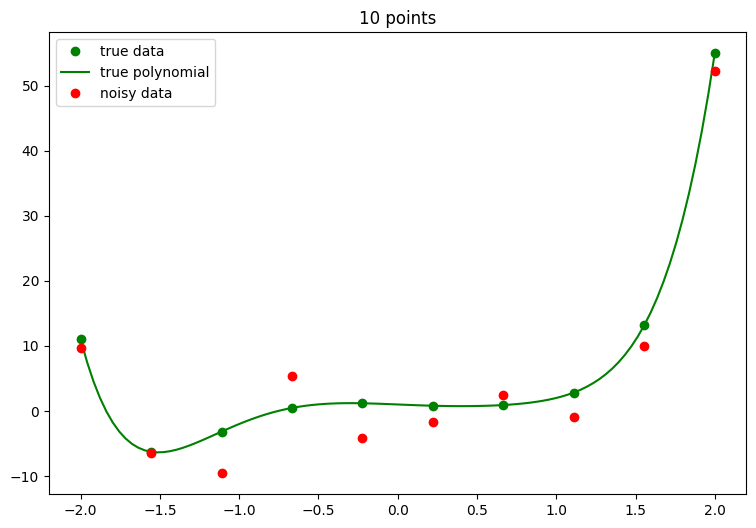

In [14]:
def f_p_true(x):
    return x**6 - 2*x**4 + 3*x**3 - x + 1

ndata = 10
datax = np.linspace(-2,2,ndata)

NOISE = 3
dataytrue = f_p_true(datax)
# fijamos la semilla aleatoria para obtener siempre el mismo ruido
np.random.seed(2)
datay = dataytrue + NOISE * np.random.randn(ndata)

xs = np.linspace(-2,2,100)
ystrue = f_p_true(xs)

plt.figure(figsize=(9, 6))
plt.plot(datax, dataytrue, 'og', label='true data')
plt.plot(xs, ystrue, '-g', label='true polynomial')
plt.plot(datax, datay, 'or', label='noisy data')
plt.title('%d points'%ndata)
plt.legend()
plt.show()

Usando `polyfit`, ajustamos polinomios a los datos con ruido... observamos que la aproximación empeora al aumentar el grado del polinomio aproximador.

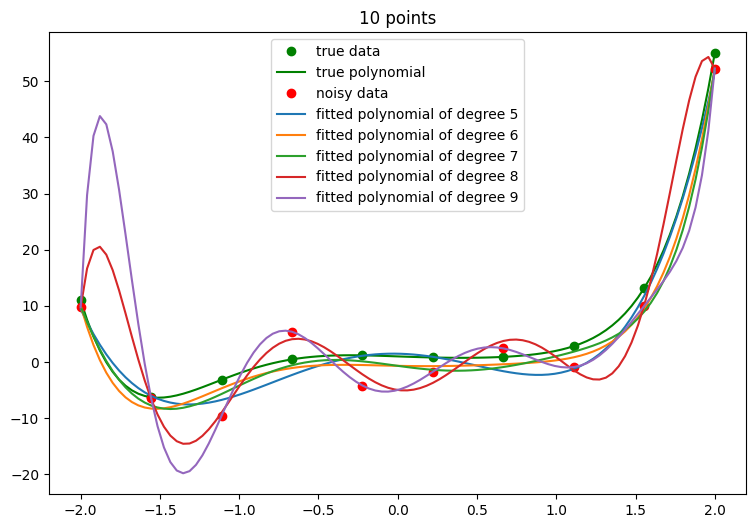

In [15]:
def f_p_true(x):
    return x**6 - 2*x**4 + 3*x**3 - x + 1


x_eval = np.linspace(-2,2,100)
ystrue = f_p_true(x_eval)

plt.figure(figsize=(9, 6))
plt.plot(datax, dataytrue, 'og', label='true data')
plt.plot(x_eval, ystrue, '-g', label='true polynomial')
plt.plot(datax, datay, 'or', label='noisy data')
for deg in range(5,10):
    cs = np.polyfit(datax, datay, deg)
    ysfitted = np.polyval(cs, x_eval)
    plt.plot(x_eval, ysfitted, label='fitted polynomial of degree %d'%deg)
plt.title('%d points'%ndata)
plt.legend()
plt.show()

### Curiosidad (opcional)

Vamos a pedir al ordenador que use __cálculo simbólico__ para minimizar el error cuadrático total.

Después sacaremos partido a este ejercicio ...

Creamos un polinomio simbólico genérico, que depende de 9 variables $a_0,\dots,a_8$:

$$
a_{0} + a_{1} x + a_{2} x^{2} + a_{3} x^{3} + a_{4} x^{4} + a_{5} x^{5} + a_{6} x^{6} + a_{7} x^{7} + a_{8} x^{8}
$$

In [16]:

x = sym.Symbol('x')

n = 8
l_an = [sym.Symbol('a_%d'%j) for j in range(n+1)]
v_an = sym.Matrix(l_an)
monomios = [x**j for j in range(n+1)]
p = sum(ai*xi for (ai,xi) in zip(l_an, monomios))
p

a_0 + a_1*x + a_2*x**2 + a_3*x**3 + a_4*x**4 + a_5*x**5 + a_6*x**6 + a_7*x**7 + a_8*x**8

Definimos el error cuadrático total que comete `p` en los datos.

In [17]:
total_error = sum(
    (p.subs(x,xi) - yi)**2
    for xi,yi in zip(datax, datay)
).simplify()

Descomponemos ese error en términos de orden 0, 1 y 2.
Una función cuadrática de unas variables $a_0,\dots,a_n$ se puede escribir en términos de una matriz  $H$ para la parte cuadrática, un vector $\mathbf{a}$ para la parte lineal y una constante $f_0$. Es decir:
$$
f(\mathbf{x}) = \mathbf{x}^T H \mathbf{x} + \mathbf{a}^T\mathbf{x} + f_0
$$

In [18]:
# Un diccionario que asigna el valor 0 a todas las variables
a_zero = dict(zip(l_an, [0]*len(l_an)))

# Término constante del error
error0 = total_error.subs(a_zero)
# Término del error que depende linealmente de las variables a_j
error1 = sym.Matrix( [total_error.diff(a).subs(a_zero) for a in l_an])
# Término del error que depende cuadráticamente de las variables a_j
error2 = sym.hessian(total_error, l_an)

Comprobamos que `error0`, `error1`, `error2` recuperan correctamente `total_error`:

In [19]:
recovered = (
    error0 +
    (error1.transpose()*v_an)[0,0] +
    (1/2)*(v_an.transpose()* error2 * v_an)[0,0]
)
(recovered - total_error).expand()

0

Una función cuadrática de unas variables $a_0,\dots,a_n$ tiene un único mínimo, que se alcanza en $H^{-1}\mathbf{a}$. Y recuperamos el polinomio.

In [20]:
minimizer = -error2.inv()*error1
print(minimizer)

Matrix([[-4.98559706834340], [-3.85822249889717], [44.3187151174061], [9.75189771117118], [-67.2955634923346], [-3.85817455699382], [30.0655486218420], [0.581317777240329], [-3.86228127935647]])


Comprobamos que con el cálculo simbólico hemos recuperado el polinomio aproximador (solo que en el orden inverso)

In [21]:
cs = np.polyfit(datax, datay, 8)
cs

array([ -3.86228128,   0.58131778,  30.06554862,  -3.85817456,
       -67.29556349,   9.75189771,  44.31871512,  -3.8582225 ,
        -4.98559707])

Recuperamos el polinomio aproximador con polyfit y con sympy: son el mismo, claro.

In [22]:
print(sum(c*x**(8-j) for j,c in zip(range(9), cs) ))
print(sum(c*x**j for j,c in zip(range(9), minimizer) ))

-3.86228127915352*x**8 + 0.581317777241524*x**7 + 30.0655486203166*x**6 - 3.85817455700017*x**5 - 67.2955634889083*x**4 + 9.7518977111855*x**3 + 44.3187151150434*x**2 - 3.85822249890506*x - 4.98559706809972
-3.86228127935647*x**8 + 0.581317777240329*x**7 + 30.065548621842*x**6 - 3.85817455699382*x**5 - 67.2955634923346*x**4 + 9.75189771117118*x**3 + 44.3187151174061*x**2 - 3.85822249889717*x - 4.9855970683434


In [23]:
for aj in total_error.free_symbols:
    print(aj, str(aj), int(str(aj)[2:]), x**int(str(aj)[2:]))


a_2 a_2 2 x**2
a_5 a_5 5 x**5
a_3 a_3 3 x**3
a_4 a_4 4 x**4
a_8 a_8 8 x**8
a_6 a_6 6 x**6
a_7 a_7 7 x**7
a_1 a_1 1 x
a_0 a_0 0 1


In [24]:
a_zero = dict(zip(l_an, [0]*len(l_an)))
vmonomios = sym.Matrix(monomios)

def minimo(target):
    '''Solo para funciones cuadraticas de a_0,...,a_n: 
    devuelve el polinomio a_0+...+a_n*x**n
    con los a_0,...,a_n que minimizan la funcion argumento
    '''
    linear = sym.Matrix( [target.diff(a).subs(a_zero) for a in l_an])
    H = sym.hessian(target, l_an)
    minimizer = -H.inv()*linear
    p_minimizer = (vmonomios.transpose()*minimizer)[0,0]
    return p_minimizer

In [25]:
minimo(total_error)

-3.86228127935647*x**8 + 0.581317777240329*x**7 + 30.065548621842*x**6 - 3.85817455699382*x**5 - 67.2955634923346*x**4 + 9.75189771117118*x**3 + 44.3187151174061*x**2 - 3.85822249889717*x - 4.9855970683434

## Regularización

El ejemplo anterior nos deja mal sabor de boca: tenemos que elegir entre un polinomio de grado bajo que es poco expresivo y no recoje la no linearidad de los datos, o uno de grado alto que se puede ajustar mejor, pero también puede __sobreajustar__ a los datos, adaptarse demasiado bien a los datos que tenemos, que tienen ruido, y no capturar la tendencia general.

La idea de la regularización es buscar un **equilibrio entre una función que ajuste bien a los datos, pero que no varíe bruscamente**. De esta forma podemos usar un modelo tan complejo como queramos, sin caer en sobreajuste.

Pedir a la función que tenga derivada pequeña en los puntos de interpolación no resuelve el problema: *al igual que el polinomio de Lagrange oscila fuera de los puntos de control, el polinomio de Hermite también hace lo mismo*.

Para conseguir que la función no varíe bruscamente, es necesario acotar alguna **norma**, como por ejemplo:

$$
\Vert f' \Vert_2^2 = \int_0^1 \left(f'(x)\right)^2 \:d x
$$

Si f tiene la forma:
$$
f(x) = \sum_{j=0}^m a_j f_j(x)
$$
entonces:
$$
\begin{split}
\Vert f' \Vert_2^2 
&= \int_0^1 \left(f'(x)\right)^2 \:d x \\
&= \int_0^1 \sum_{i=0}^m \sum_{j=0}^m a_i a_j  f_i'(x) f_j'(x) \:d x \\
&= \sum_{i=0}^m \sum_{j=0}^m a_i a_j  \int_0^1 f_i'(x) f_j'(x) \:d x \\
&= \mathbf{a}^T\cdot  B \cdot \mathbf{a}
\end{split}
$$
donde $B$ es la matriz con entradas
$$
B_{ij} = \int_0^1 f_i'(x) f_j'(x)
$$
**¡¡$\mathbf{\Vert f' \Vert_2^2 }$ es una función cuadrática de $\mathbf{a}$!!**

### Regularización de Tychonov

En vez de minimizar
$$
E(\mathbf{a})=
\left\Vert \mathbf{y} - F\cdot \mathbf{a}\right\Vert^2
$$
minimizamos
$$
E_{\varepsilon}(\mathbf{a})=
\left\Vert \mathbf{y} - F\cdot \mathbf{a}\right\Vert^2
+\varepsilon \Vert f' \Vert_2^2 
$$
o 
$$
E_{\varepsilon}(\mathbf{a})=
\left\Vert \mathbf{y} - F\cdot \mathbf{a}\right\Vert^2
+\varepsilon \Vert f'' \Vert_2^2 
$$
o similar, para conseguir una función que tenga error total pequeño, y que *además* varíe poco...

> Como $E_{\varepsilon}(\mathbf{a})$ es cuadrática en $\mathbf{a}$, es fácil encontrar el mínimo (aunque calcular la matriz $B$ sí puede ser costoso...)


Para calcular todas las integrales $B_{ij} = \int_0^1 f_i'(x) f_j'(x)$, recurrimos al cálculo simbólico, usando `sympy`.
Vamos a usar monomios $f_i(x)=x^i$ para $i=0,\dots,8$.

`p` es un polinomio combinación lineal de los monomios $f_i$:
$$
p(x) = a_{0} + a_{1} x + a_{2} x^{2} + a_{3} x^{3} + a_{4} x^{4} + a_{5} x^{5} + a_{6} x^{6} + a_{7} x^{7} + a_{8} x^{8}
$$

In [26]:
x = sym.Symbol('x')

n = 8
l_an = [sym.Symbol('a_%d'%j) for j in range(n+1)]
monomios = [x**j for j in range(n+1)]
p = sum(ai*xi for (ai,xi) in zip(l_an, monomios))
p

a_0 + a_1*x + a_2*x**2 + a_3*x**3 + a_4*x**4 + a_5*x**5 + a_6*x**6 + a_7*x**7 + a_8*x**8

In [27]:
pd = p.diff(x)
pd

a_1 + 2*a_2*x + 3*a_3*x**2 + 4*a_4*x**3 + 5*a_5*x**4 + 6*a_6*x**5 + 7*a_7*x**6 + 8*a_8*x**7

In [28]:
pd**2

(a_1 + 2*a_2*x + 3*a_3*x**2 + 4*a_4*x**3 + 5*a_5*x**4 + 6*a_6*x**5 + 7*a_7*x**6 + 8*a_8*x**7)**2

In [29]:
norma = sym.integrate(pd**2, (x,-2,2))
norma

4*a_1**2 + 32*a_1*a_3 + 128*a_1*a_5 + 512*a_1*a_7 + 64*a_2**2/3 + 1024*a_2*a_4/5 + 6144*a_2*a_6/7 + 32768*a_2*a_8/9 + 576*a_3**2/5 + 7680*a_3*a_5/7 + 14336*a_3*a_7/3 + 4096*a_4**2/7 + 16384*a_4*a_6/3 + 262144*a_4*a_8/11 + 25600*a_5**2/9 + 286720*a_5*a_7/11 + 147456*a_6**2/11 + 1572864*a_6*a_8/13 + 802816*a_7**2/13 + 4194304*a_8**2/15

En este caso, `norma` es una función cuadrática de los datos, que sólo tiene términos de orden 2: ni constante, ni término constante.

In [30]:
H = sym.hessian(norma, l_an)
H

Matrix([
[0,   0,       0,       0,         0,         0,          0,          0,          0],
[0,   8,       0,      32,         0,       128,          0,        512,          0],
[0,   0,   128/3,       0,    1024/5,         0,     6144/7,          0,    32768/9],
[0,  32,       0,  1152/5,         0,    7680/7,          0,    14336/3,          0],
[0,   0,  1024/5,       0,    8192/7,         0,    16384/3,          0,  262144/11],
[0, 128,       0,  7680/7,         0,   51200/9,          0,  286720/11,          0],
[0,   0,  6144/7,       0,   16384/3,         0,  294912/11,          0, 1572864/13],
[0, 512,       0, 14336/3,         0, 286720/11,          0, 1605632/13,          0],
[0,   0, 32768/9,       0, 262144/11,         0, 1572864/13,          0, 8388608/15]])

Recuperamos la norma como
$$
\Vert f' \Vert_2^2 = \frac{1}{2}\mathbf{a}^T \cdot H \cdot \mathbf{a}
$$
(salvo error numérico)

In [31]:
v_an = sym.Matrix(l_an)
((1/2)*(v_an.transpose()* H * v_an)[0,0] + norma).simplify()

8.0*a_1**2 + 64.0*a_1*a_3 + 256.0*a_1*a_5 + 1024.0*a_1*a_7 + 42.6666666666667*a_2**2 + 409.6*a_2*a_4 + 1755.42857142857*a_2*a_6 + 7281.77777777778*a_2*a_8 + 230.4*a_3**2 + 2194.28571428571*a_3*a_5 + 9557.33333333333*a_3*a_7 + 1170.28571428571*a_4**2 + 10922.6666666667*a_4*a_6 + 47662.5454545455*a_4*a_8 + 5688.88888888889*a_5**2 + 52130.9090909091*a_5*a_7 + 26810.1818181818*a_6**2 + 241979.076923077*a_6*a_8 + 123510.153846154*a_7**2 + 559240.533333333*a_8**2

Construimos nuestra nueva función objetivo: minimizar la suma del error cuadrático y el término de regularización

In [32]:
epsilon_Tychonov = 0.2
target = total_error + epsilon_Tychonov*norma
p_reg = minimo(target)

Obtenemos un polinomio regularizado (en la gráfica de abajo en azul) que oscila menos que el polinomio aproximador.

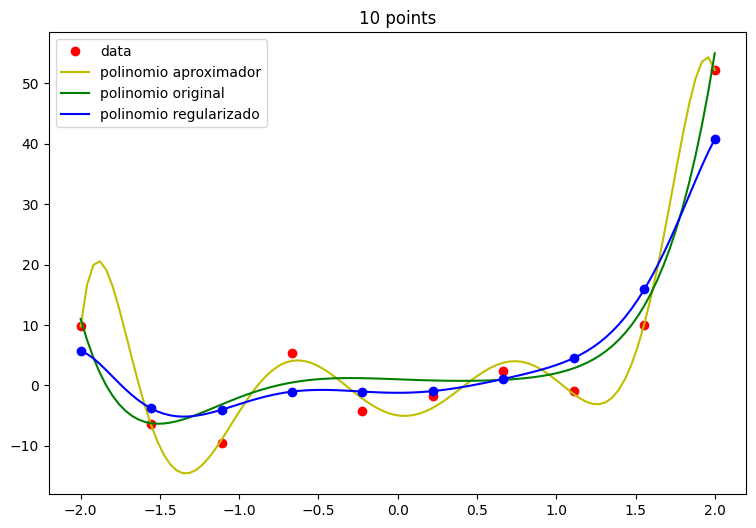

In [33]:
cs = np.polyfit(datax, datay, n)
f_p_reg = sym.lambdify(x,p_reg)

ysfitted = np.polyval(cs, x_eval)

ys_reg = f_p_reg(x_eval)
ytilde_reg = f_p_reg(datax)

plt.figure(figsize=(9, 6))
#plt.plot(datax, dataytrue, 'og')
plt.plot(datax, datay, 'or', label='data')
plt.plot(x_eval, ysfitted, 'y-', label='polinomio aproximador')
plt.plot(x_eval, ystrue, '-g', label='polinomio original')
plt.plot(x_eval, ys_reg, 'b-', label='polinomio regularizado')
plt.plot(datax, ytilde_reg, 'ob')
plt.title('%d points'%ndata)
plt.legend()
plt.show()

Variando el $\varepsilon$ en el error:
$$
E_{\varepsilon}(\mathbf{a})=
\left\Vert \mathbf{y} - F\cdot \mathbf{a}\right\Vert^2
+\varepsilon \Vert f' \Vert_2^2 
$$
podemos afinar la cantidad de regularización:

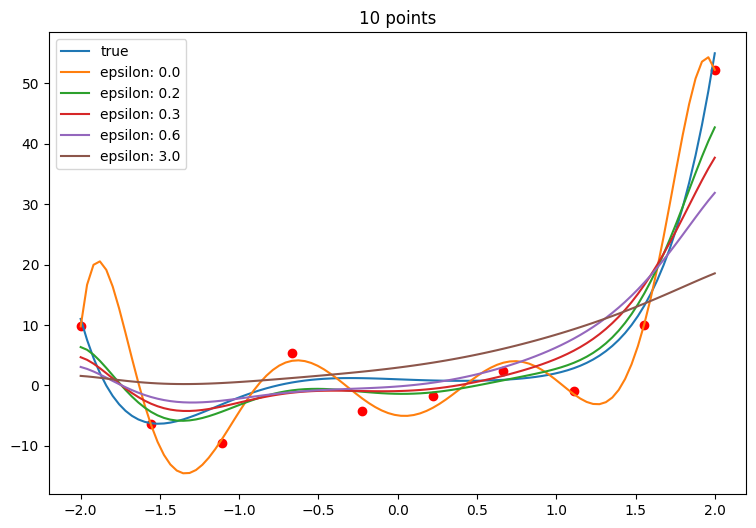

In [34]:
plt.figure(figsize=(9, 6))
#plt.plot(datax, dataytrue, 'og')
plt.plot(datax, datay, 'or')
plt.plot(x_eval, ystrue, label='true')
for epsilon in [0, 0.05*NOISE, 0.1*NOISE, 0.2*NOISE, NOISE]:
    target = total_error + epsilon*norma
    p_reg = minimo(target)
    f_p_reg = sym.lambdify(x,p_reg)
    ys_reg = f_p_reg(x_eval)
    ytilde_reg = f_p_reg(datax)
    plt.plot(x_eval,ys_reg, label='epsilon: %.1f'%epsilon)
#    plt.plot(datax, ytilde_reg)
plt.title('%d points'%ndata)
plt.legend()
plt.show()

### Conclusiones

 - Si interpolamos datos que incluyen mediciones con error, podemos **sobreajustar** el modelo a los datos (**overfitting**). El modelo puede perder capacidad predictiva.
 - Si en vez de interpolar, usamos aproximación, pero el modelo tiene *muchos parámetros libres*, también se puede producir sobreajuste.
 - **Regularizar** el error puede conseguir evitar el sobreajuste, porque incluso con más parámetros que datos, se evita elegir un modelo que varíe demasiado para ajustarse exactamente a los datos.
 
Por cierto, la regularización tiene una justificación estadística similar a la de la aproximación.

## Funciones de varias variables

Lo que hablamos sobre interpolación y aproximación en una dimensión aplica sin cambios a funciones de varias variables, cuando conocemos el valor de una función $f$ en una serie de puntos de $\mathbb{R}^d$:
$$
f(x_1,\dots,x_d) = \sum_{j=0}^m a_j f_j(x_1,\dots,x_d)
$$
sólo que es necesario encontrar una buena base de funciones de dos variables. De ese tema hablaremos poco en esta asignatura, pero hay un amplio catálogo...

![Comparison_of_1D_and_2D_interpolation](Comparison_of_1D_and_2D_interpolation.svg)

Ejemplo de cómo las distintas técnicas de interpolación construyen funciones definidas en el cuadrado unidad a partir de los valores de la función en 25 puntos.

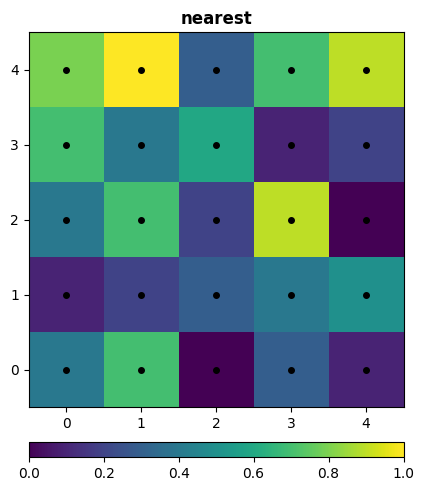

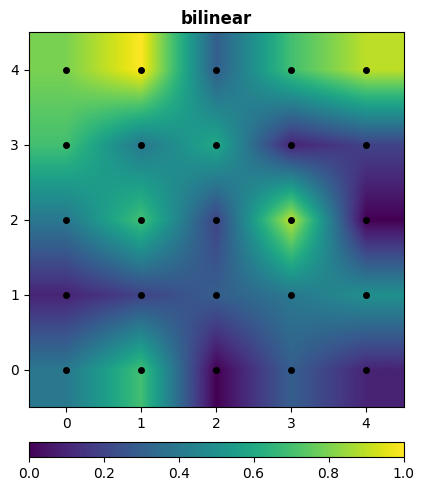

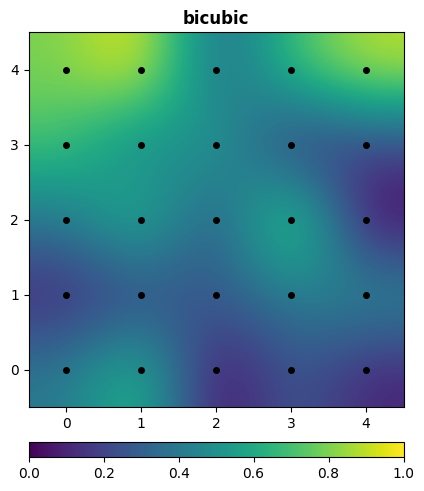

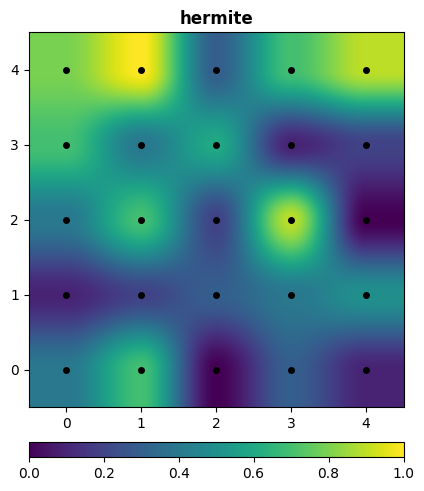

In [35]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-

import sys
import numpy as np
import matplotlib.pyplot as plt

# Available interpolation methods:
# 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
# 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
# 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'
METHODS = [ 'nearest', 'bilinear', 'bicubic', 'hermite' ]
COLORS  = 'viridis'

N = 5
np.random.seed(1)
grid = np.arange(0, N, 1)
data = np.round(np.random.rand(N, N), 1)
mesh = np.meshgrid(grid, grid)

for interp in METHODS:

    fig = plt.figure(figsize=(5,5))

    ax = fig.add_axes([0.125, 0.175, 0.75, 0.75])
    plt.imshow(data, interpolation=interp, cmap=COLORS, vmin=0, vmax=1)
    plt.plot(mesh[0], mesh[1], marker='.', ms=8, color='k', lw=0)
    plt.title(interp, weight='bold')
    plt.xlim(grid.min()-0.5, grid.max()+0.5)
    plt.ylim(grid.min()-0.5, grid.max()+0.5)
    plt.xticks(grid)
    plt.yticks(grid)

    cax = fig.add_axes([0.125, 0.075, 0.75, 0.03])
    cb = plt.colorbar(cax=cax, orientation='horizontal',
                      ticks=np.linspace(0, 1, 6))
    cb.solids.set_edgecolor('face')
    plt.show()

## ¿Y si no buscamos una combinación lineal?

Todo lo dicho en esta hoja funciona cuando buscamos una función de la forma
$$
f(x) = \sum_{j=0}^m a_j f_j(x)
$$
para una base de funciones $\{f_j(x)\}$.

**¿Qué hacemos cuando no es así?** Por ejemplo, las clásicas:
$$f(x)=be^{ax},\qquad f(x)=bx^{a} $$
Si definimos el error cuadrático total, no es una función cuadrática de los parámetros $a$ y $b$:
$$
\sum_{i=0}^n \left(y_i - be^{ax_i}\right)^2
$$
En esos casos, tenemos que usar **software de minimización de funciones**, para encontrar el mínimo $(a^*, b^*)$.
Por ejemplo, [`scipy.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

Vamos a comparar `scipy.curve_fit` con nuestro ya conocido `numpy.polyfit`.

Para ello consideramos un modelo de juguete. Hacemos el siguiente experimento. Lanzamos una botella de un litro llena de agua desde lo alto de la torre de Pisa. Medimos en distintos tiempos la distancia recorrida por la botella. Importamos esos datos desde un fichero de texto `FreeFallData.txt`.

Intentamos ajustar los datos a un polinomio de grado dos:
    $$p(t)=a_0+a_1t+a_2t^2,$$
y calculamos el valor de la aceleración para estimar la gravedad $g$:
    $$g\approx p''(t)=2a_2.$$

the acceleration due to gravity is:
6.699997860930492


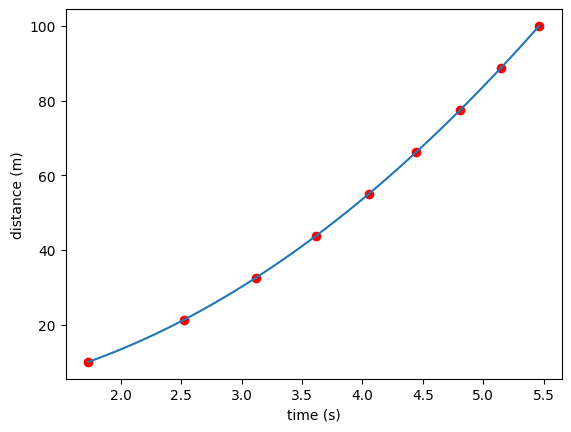

In [36]:
"""
Program to determine the accelaration due to gravity from distance 
versus time data
"""
## Read the data from the file. 
xs,ys = np.loadtxt('FreeFallData.txt', unpack=True)

## Plot the data and label the graph
plt.plot(xs,ys,'or',label='Data')
plt.xlabel('time (s)')
plt.ylabel('distance (m)')

## Fit a polynomial to the data,
cs = np.polyfit(xs,ys,2)

## Plot the degree-two polynomial fit
x_eval = np.linspace(xs.min(),xs.max(), 100)
y_eval = np.polyval(cs,x_eval)
plt.plot(x_eval,y_eval,label='Quadratic fit')

## Print out the value of g from the fit 
g = 2*cs[0]
print("the acceleration due to gravity is:")
print(g)

Hacemos ahora lo mismo con `scipy.curve_fit`. Además de los puntos `xs`y los valores `ys`tenemos que pasarle una función de Python `fit_func` en el que el primer argumento es la variable en que evaluamos y los restantes argumentos son los parámetros del modelo.

En nuestro caso la variable es el tiempo `t`y los parámetros son los coeficientes del polinomio de grado dos `a0, a1, a2`:

```python
    def fit_func(t,a0,a1,a2):
        return a0 + a1*t + a2*t**2\n",
```

the acceleration due to gravity is:
-250.93459385992037


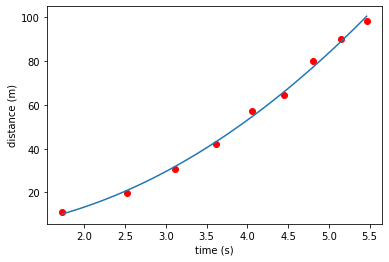

In [2]:
"""
Program to determine the acceleration due to gravity from distance 
versus time data
"""

from scipy.optimize import curve_fit

## Read the data from the file
filename = 'FreeFallData_err.txt' # allow user to chose file
## Read the data from the file
xs,ys = np.loadtxt(filename, unpack=True)

## Plot the data and label the graph
plt.plot(xs,ys,'or', label='Data')
plt.xlabel('time (s)')
plt.ylabel('distance (m)')

def fit_func(t,a0,a1,a2):
    return a2*t**2 + a1*t + a0
#    return a0+ a1*t**a2
#    return(a0+a1*np.exp(a2*t))
    
a_fit, cov = curve_fit(fit_func,xs,ys)
x_eval = np.linspace(xs.min(),xs.max(), 100)
y_eval = fit_func(x_eval, a_fit[0], a_fit[1], a_fit[2])
plt.plot(x_eval,y_eval,label='Quadratic fit with `curve_fit`' )

## Print out the value of g from the fit 
g = a_fit[1]*a_fit[2]*np.exp(a_fit[2])
print("the acceleration due to gravity is:")
print(g)

Si modificamos la función `fit_func` obtenemos distintas predicciones.

Prueba a cambiarla a

- $a_0 + a_1e^{a_2t}$,
- $a_0 + a_1 t^{a_2}$,

y modifica como corresponda la fórmula para predecir el valor de la gravedad.

Hagamos ahora un ejemplo menos trivial. Importamos datos obtenidos a través de un osciloscopio en el fichero `signal_data.txt`

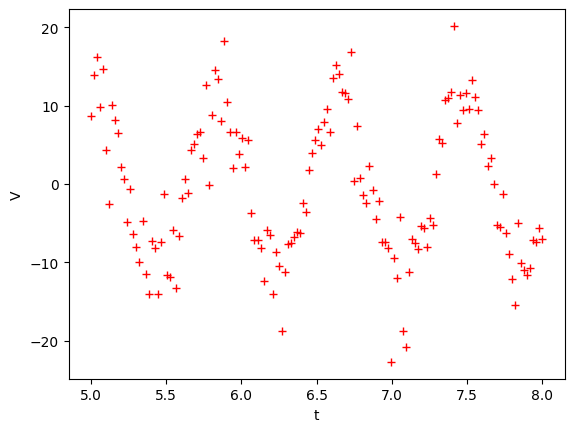

In [38]:
filename = 'signal_data.txt'
t,V = np.loadtxt(filename, unpack=True)

## Plot the data and allow user to input best guess parameters
plt.figure(1)
plt.clf()
plt.plot(t,V,'+r', label='Data')
plt.xlabel('t')
plt.ylabel('V')
plt.show()

A la vista de esto, tiene sentido plantear como modelo una función sinusoidal del tiempo $t$:
$$ A\sin(2\pi f t + \varphi),$$
donde los parámetros del modelo son:
- La amplitud $A$,
- La frecuencia $f$,
- Es desfase $\varphi$.

Usaremos esto para definir nuestra `fit_func`.

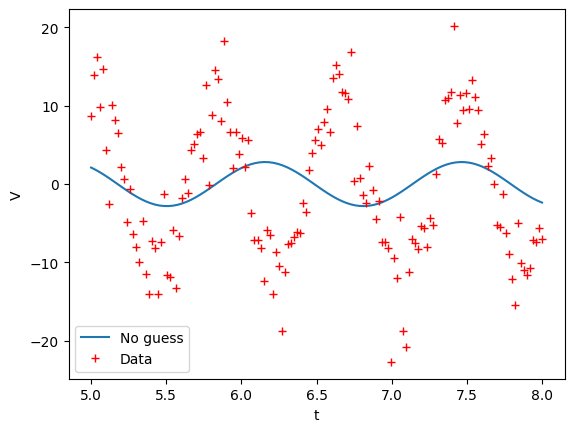

In [39]:
# Define fit_func
def fit_func(t,A,f,phi):
    return A*np.sin(2*np.pi*f*t - phi)

a_fit, cov = curve_fit(fit_func,t,V)
A_fit = a_fit[0]
f_fit = a_fit[1]
phi_fit = a_fit[2]

x_eval = np.linspace(t.min(), t.max(), 100)

plt.plot(x_eval, fit_func(x_eval,A_fit,f_fit,phi_fit), label='No guess') 
plt.plot(t,V,'+r', label='Data')
plt.xlabel('t')
plt.ylabel('V')
plt.legend()

¡El modelo no captura para nada la tendencia de los datos!

La razón es que, en el proceso de minimizar el error (es decir, buscar sus puntos críticos, donde sus derivada son cero) `scipy.curve_fit` ha encontrado previamente un mínimo/máximo local, o un punto silla, que están lejos del mínimo absoluto (acordaos que lo que sucedía cuando calculamos raíces de funciones).

Esto se arregla proporcionando a `scipy.curve_fit` una aproximación inicial de los parámetros, que obtenemos examinando nuestro dataset. Dicha aproximación se pasa como el argumento opcional `p0`.

A = 11.6863 +/- 0.417097
f = 1.22711 +/- 0.00692189
phi = -0.547259 +/- 0.284606


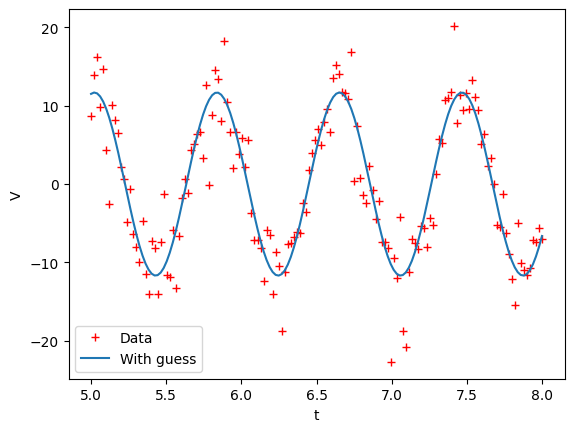

In [40]:
A_g = 11.0
f_g = 1.25
phi_g = 0

a_guess = [A_g,f_g,phi_g]

## Do the fit and decode the output


a_fit, cov = curve_fit(fit_func,t,V,p0=a_guess)
A_fit = a_fit[0]
f_fit = a_fit[1]
phi_fit = a_fit[2]

sig_A = np.sqrt(cov[0][0])
sig_f = np.sqrt(cov[1][1])
sig_phi = np.sqrt(cov[2][2])

## Display the results
print('A = %g +/- %g' % (A_fit,sig_A))
print('f = %g +/- %g' % (f_fit,sig_f))
print('phi = %g +/- %g' % (phi_fit,sig_phi))


V_fit = fit_func(t,A_fit,f_fit,phi_fit)

plt.figure(1)
plt.clf()
plt.plot(t,V,'+r', label='Data')
plt.xlabel('t')
plt.ylabel('V')
plt.plot(t,V_fit,label='With guess')
plt.legend()